Acetaminophen exposures in prior year          Urinary tract infectious disease in prior year
Occurrence of Alcoholism in prior year               Antibiotics Oxazolidinones in prior year
Anemia in prior year                                     predicted risk of Pulmonary Embolism
Angina events in prior year                 Type 1 diabetes and no prior specific non-T1DM...
ANTIEPILEPTICS in prior year                          predicted risk of Restless Leg Syndrome
                                                                  ...                        
Antibiotics Polypeptides in prior year                     Heart valve disorder in prior year
Antibiotics Rifamycins in prior year                    Antibiotics Penicillins in prior year
Antibiotics Sulfonamides in prior year                        Aspirin exposures in prior year
Antibiotics Streptogramins in prior year       Urinary tract infectious disease in prior year
Antibiotics Tetracyclines in prior year     predicted risk o

,Factor,Strongest correlation (factors and predicted risk),Strongest correlation (predicted risk only)
0,Acetaminophen exposures in prior year,Urinary tract infectious disease in prior year,predicted risk of Restless Leg Syndrome
1,Occurrence of Alcoholism in prior year,Antibiotics Oxazolidinones in prior year,predicted risk of Treatment resistant depress...
2,Anemia in prior year,predicted risk of Pulmonary Embolism,predicted risk of Pulmonary Embolism
3,Angina events in prior year,Type 1 diabetes and no prior specific non-T1DM...,predicted risk of Multiple Sclerosis
4,ANTIEPILEPTICS in prior year,predicted risk of Restless Leg Syndrome,predicted risk of Restless Leg Syndrome
...,...,...,...
59,Antibiotics Polypeptides in prior year,Heart valve disorder in prior year,"predicted risk of Acute pancreatitis, with No ..."
60,Antibiotics Rifamycins in prior year,Antibiotics Penicillins in prior year,predicted risk of Muscle weakness or injury
61,Antibiotics Sulfonamides in prior year,Aspirin exposures in prior year,predicted risk of Ulcerative colitis
62,Antibiotics Streptogramins in prior year,Urinary tract infectious disease in prior year,predicted risk of Ankylosing Spondylitis


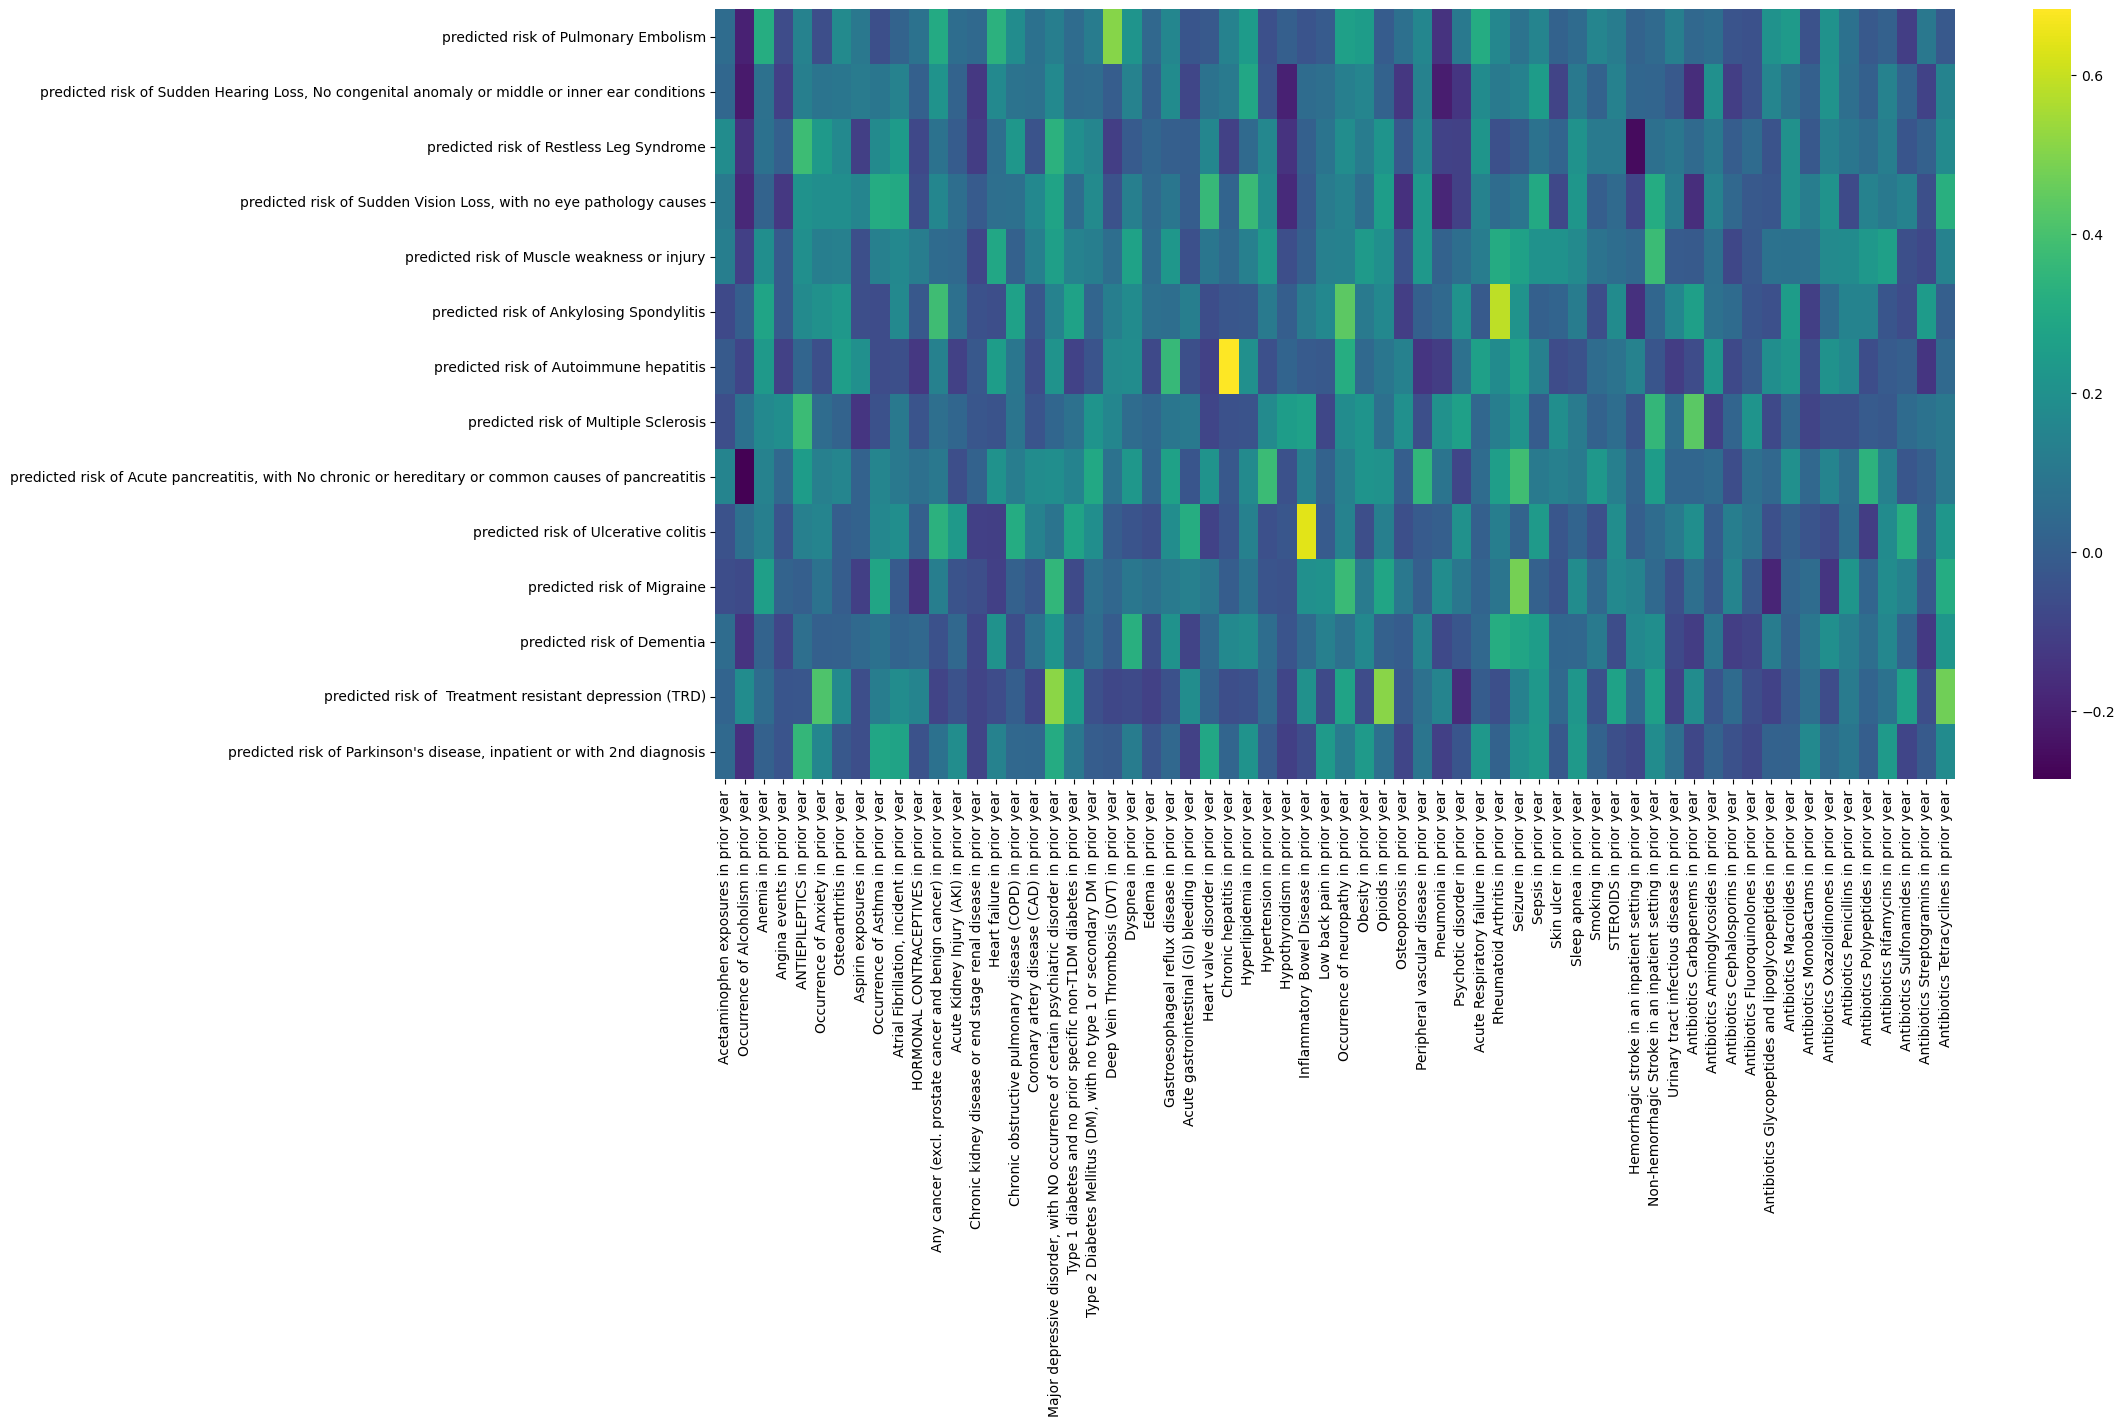

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import IPython.display as ipd

factors_preds = pd.read_csv('factors_preds.csv')
factors_preds = factors_preds.drop('personId',axis=1)
factors_data = pd.read_csv('factors_data.csv')
factors_data = factors_data.drop('personId', axis=1)

use_factors_preds = factors_preds.copy()
factor_pred_corrs = use_factors_preds.corr('pearson')
factor_pred_corrs = factor_pred_corrs.drop(factors_preds.iloc[:,-14:].columns.values, axis=1)
factor_pred_corrs.replace(1.000000, np.nan, inplace=True) #so that when finding max, these values (correlation to itself) can be skipped
print(factor_pred_corrs.idxmax()) #shows the highest correlation for each of the variables (including measuring the factors against each other)
factor_pred_corrs_1v1 = factor_pred_corrs.drop(factors_data.columns.values, axis=0)
fvf_corrs = factor_pred_corrs.drop(factors_preds.iloc[:,-14:].columns.values, axis=0)
max_corrs = factor_pred_corrs.idxmax().to_frame().reset_index()
max_corrs_2 = factor_pred_corrs_1v1.idxmax().to_frame().reset_index()
max_corrs = max_corrs.merge(max_corrs_2, on='index').rename(columns={'index':'Factor','0_x':'Strongest correlation (factors and predicted risk)','0_y':'Strongest correlation (predicted risk only)'})
ipd.display(max_corrs)
max_corrs.to_csv('max_correlations.csv')


fig = plt.figure(figsize=(20,10))
ax = plt.axes()

sns.heatmap(factor_pred_corrs_1v1,cmap='viridis',xticklabels=factors_data.columns.values,ax=ax)
plt.savefig('heatmap_factors_preds')
#this shows the correlations between each of the 'prior year' factors and each of the predicted risks

Acetaminophen exposures in prior year        8
Occurrence of Alcoholism in prior year      12
Anemia in prior year                        18
Angina events in prior year                 13
ANTIEPILEPTICS in prior year                15
                                            ..
Antibiotics Polypeptides in prior year      16
Antibiotics Rifamycins in prior year        20
Antibiotics Sulfonamides in prior year      19
Antibiotics Streptogramins in prior year    16
Antibiotics Tetracyclines in prior year      9
Length: 64, dtype: int64


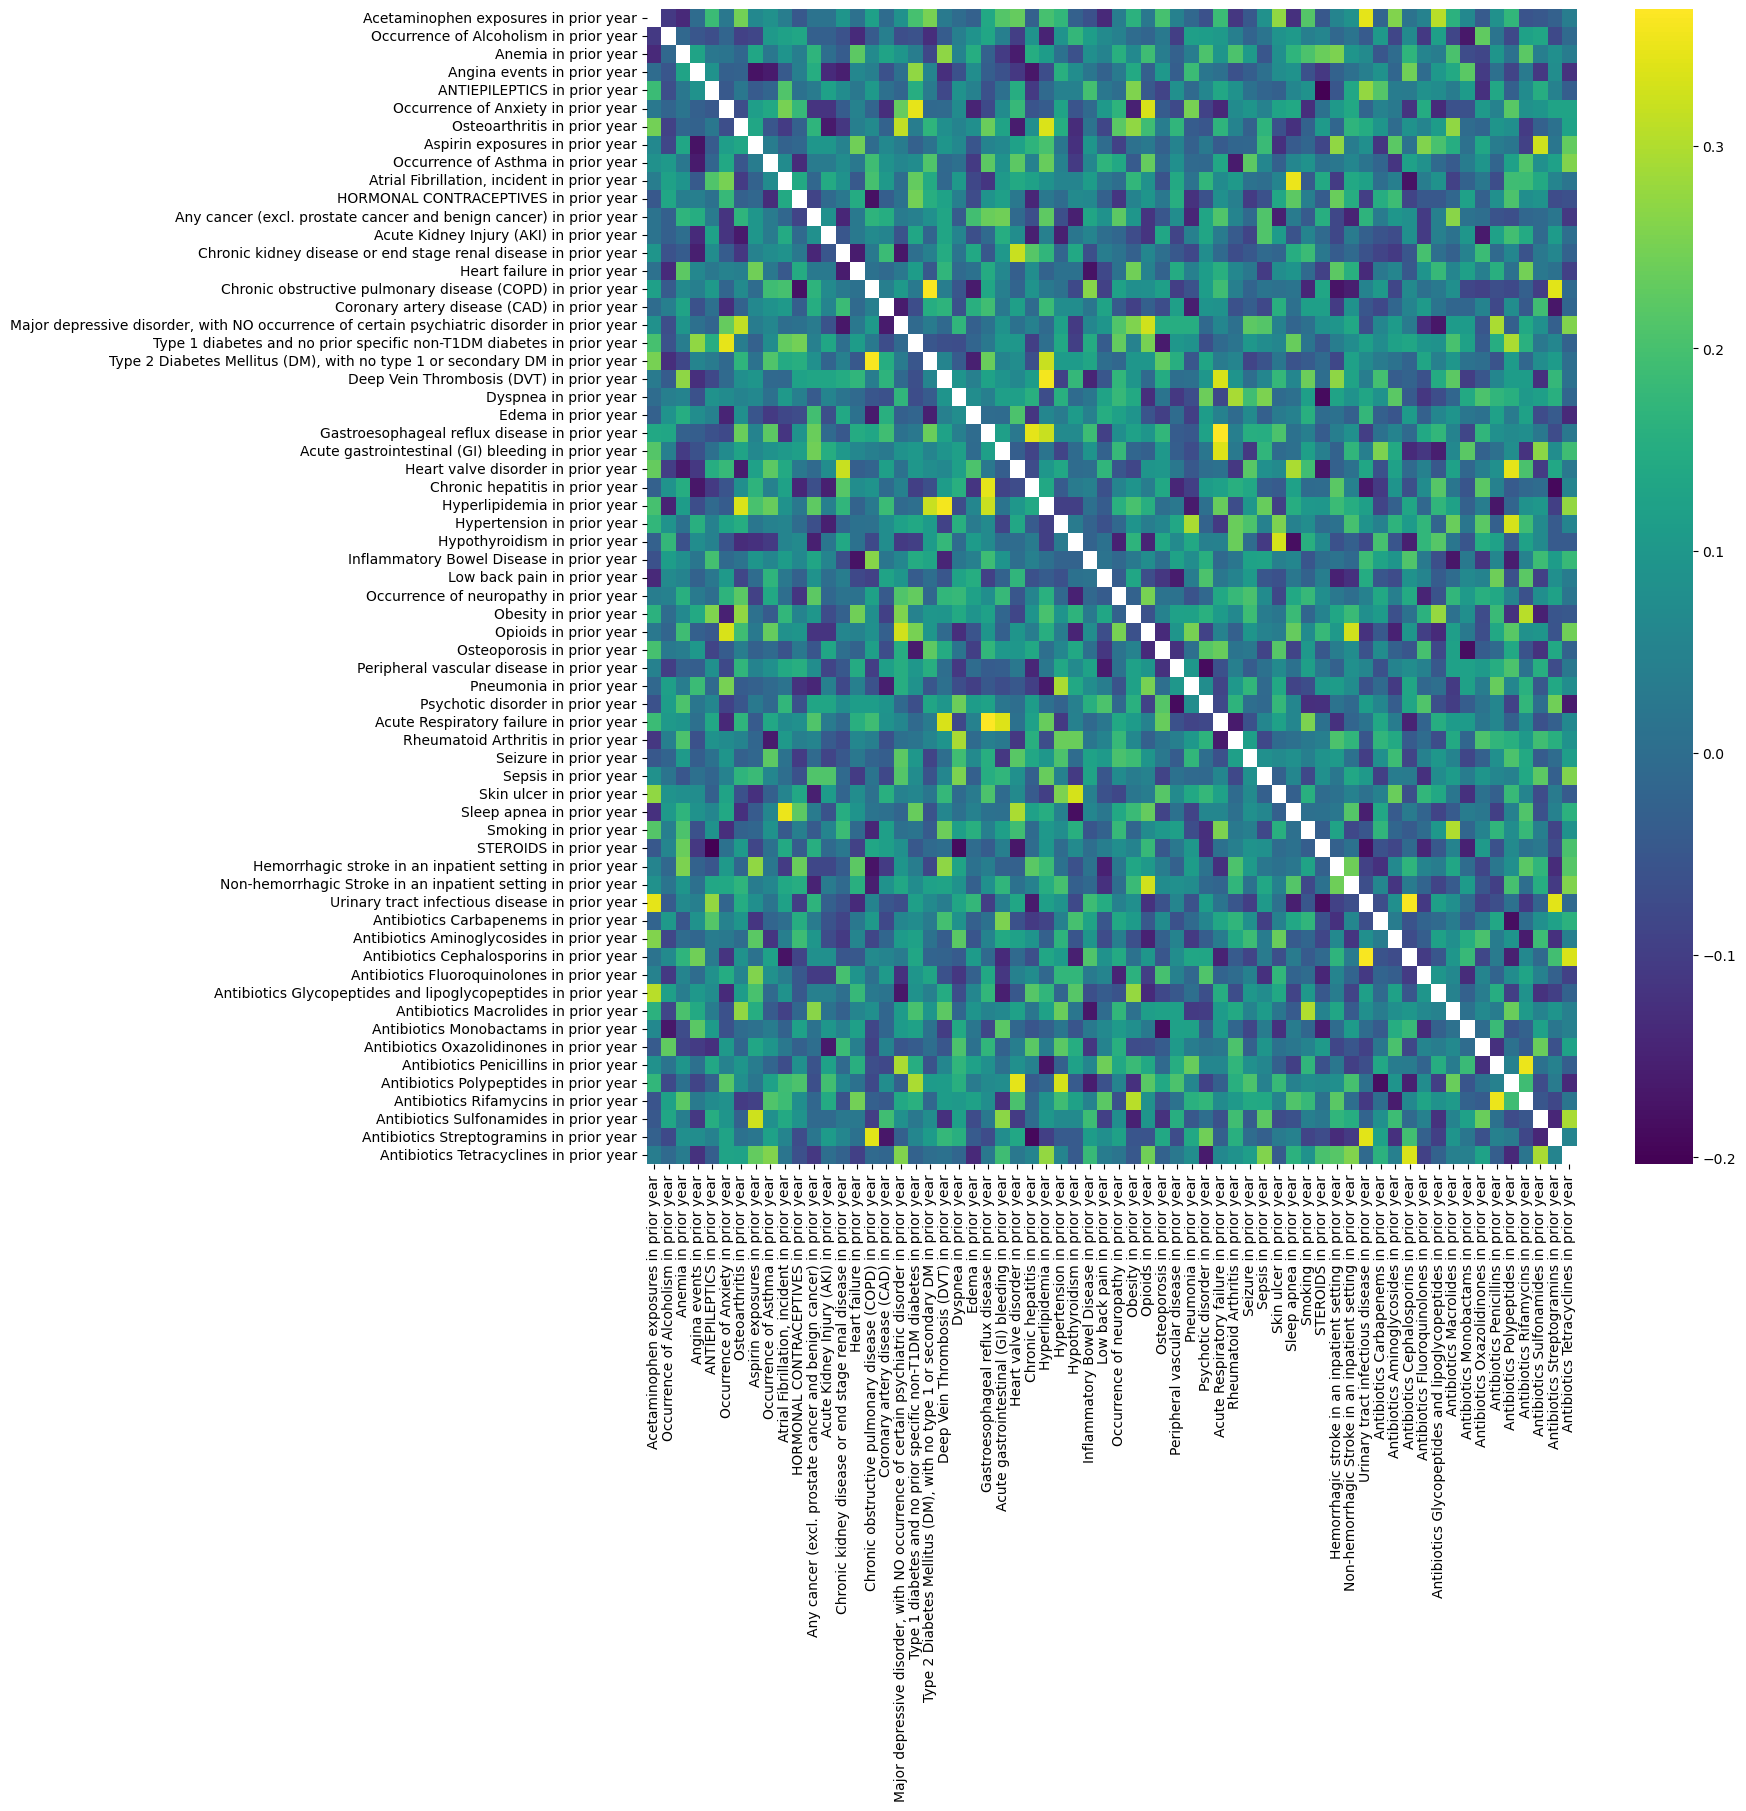

In [19]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()

sns.heatmap(fvf_corrs, cmap='viridis', xticklabels=factors_data.columns, yticklabels=factors_data.columns)
plt.savefig('heatmap_factors_factors')
#this shows the correlations between each of the 'prior year' factors

factors_data.sum() #shows how many positive results for each factor (i.e. how many patients have experienced the factor)
print(factors_data.sum())